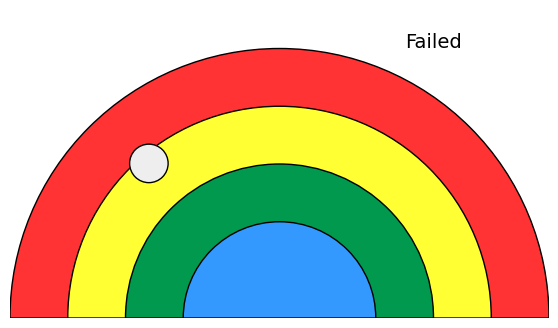

In [1]:
import matplotlib.pyplot as plt
from matplotlib.patches import Wedge, Circle
import random
import math

# Part a: 绘制彩虹
def draw_rainbow(ax):
    # 定义颜色和半径
    colors = ['#FF3333', '#FFFF33', '#00994D', '#3399FF']  # 彩虹颜色从外到内
    radii = [14, 11, 8, 5]  # 每层半圆的半径
    center = (14, 0)  # 圆心位置

    # 绘制白色背景
    ax.set_xlim(0, 28)
    ax.set_ylim(0, 16)
    ax.set_aspect('equal')

    # 绘制半圆彩虹
    for i, radius in enumerate(radii):
        wedge = Wedge(center, radius, 0, 180, facecolor=colors[i], edgecolor='black', linewidth=1)
        ax.add_patch(wedge)

# Part b: Toss 结果计算函数
def toss_result(x, y):
    radii = [14, 11, 8, 5]  # 彩虹层的半径
    colors = ['Red', 'Yellow', 'Green', 'Blue']  # 对应的颜色
    center = (14, 0)  # 半圆的中心位置
    coin_radius = 1  # 硬币的半径

    # 计算硬币圆心到中心的距离
    distance = math.sqrt((x - center[0])**2 + (y - center[1])**2)

    # 检查硬币是否完全在某一颜色层内
    for i, radius in enumerate(radii):
        if distance + coin_radius <= radius and (i == len(radii) - 1 or distance - coin_radius >= radii[i + 1]):
            return colors[i]

    # 如果硬币超出彩虹或触碰边界
    return "Failed"

# Part c: Toss 模拟并绘制
def toss_rainbow():
    # 随机生成硬币坐标
    x = random.uniform(1, 27)  # 确保硬币不超出画布
    y = random.uniform(1, 15)

    # 计算 toss 的结果
    result = toss_result(x, y)

    # 创建画布
    fig, ax = plt.subplots(figsize=(7, 4))
    ax.set_aspect('equal')
    ax.axis('off')  # 隐藏坐标轴

    # 绘制彩虹
    draw_rainbow(ax)

    # 绘制硬币
    coin = Circle((x, y), 1, facecolor='#EEEEEE', edgecolor='black', linewidth=1)
    ax.add_patch(coin)

    # 显示 toss 结果
    ax.text(22, 14, result, color='black', fontsize=14, ha='center')

    # 显示图形
    plt.show()

# 调用函数
toss_rainbow()

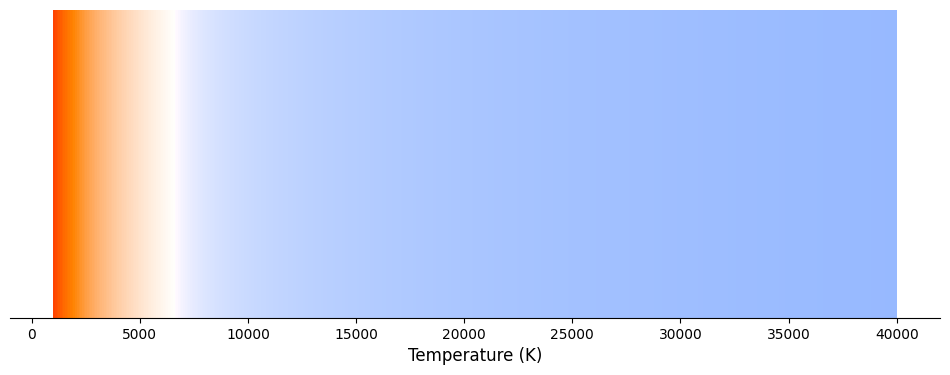

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def temp2rgb(T):
    """
    Convert temperature in Kelvin to RGB values.
    T: Temperature in Kelvin (range: 1000K to 40000K).
    Returns: Tuple (R, G, B) with RGB values between 0 and 255.
    """
    # Convert temperature from Kelvin to the scale used in equations
    T = T / 100

    # Calculate Red
    if T <= 66:
        R = 255
    else:
        R = 329.698727446 * ((T - 60) ** -0.1332047592)
    
    # Calculate Green
    if T <= 66:
        G = 99.4708025861 * np.log(T) - 161.1195681661
    else:
        G = 288.1221695283 * ((T - 60) ** -0.0755148492)
    
    # Calculate Blue
    if T >= 66:
        B = 255
    elif T <= 19:
        B = 0
    else:
        B = 138.5177312231 * np.log(T - 10) - 305.0447927307

    # Truncate values to [0, 255]
    R = max(0, min(255, R))
    G = max(0, min(255, G))
    B = max(0, min(255, B))

    return int(R), int(G), int(B)

def plot_temperature_to_color():
    """
    Generate a plot that maps temperature (in Kelvin) to colors.
    """
    # Generate temperature values
    temperatures = np.linspace(1000, 40000, 500)  # 500 temperature steps
    colors = [temp2rgb(T) for T in temperatures]
    colors_hex = ['#{:02x}{:02x}{:02x}'.format(R, G, B) for R, G, B in colors]

    # Create the figure
    fig, ax = plt.subplots(figsize=(12, 4))  # Width to height ratio = 3:1

    # Plot the color bar for 1000 to 40000
    for i, color in enumerate(colors_hex):
        ax.add_patch(plt.Rectangle((1000 + i * (40000 - 1000) / 500, 0), 
                                    (40000 - 1000) / 500, 1, 
                                    color=color, linewidth=0))

    # Configure the axis
    ax.set_xlim(-1000, 42000)
    ax.set_ylim(0, 1)

    # Remove y-axis and spines
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.yaxis.set_visible(False)

    # Configure x-axis
    ax.set_xticks(np.linspace(0, 40000, 9))  # Nine major ticks
    ax.set_xticklabels([f"{int(T)}" for T in np.linspace(0, 40000, 9)])  # Correct labels starting from 0
    ax.set_xlabel("Temperature (K)", fontsize=12)  # Add x-axis label

    plt.show()

# 调用绘图函数
plot_temperature_to_color()

In [3]:
%matplotlib qt

In [4]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import numpy as np
from PIL import Image

# 加载和调整图像大小，同时将 Logo 转为白色
def load_and_resize_logo(path, new_width=150):
    img = Image.open(path).convert('RGBA')  # 转换为RGBA模式
    aspect_ratio = img.size[1] / img.size[0]  # 宽高比
    new_height = int(new_width * aspect_ratio)
    img = img.resize((new_width, new_height), Image.Resampling.LANCZOS)  # 调整大小
    img_array = np.array(img)  # 转换为 NumPy 数组

    # 修改 Logo 的颜色：黑色部分变为白色，透明区域保持透明
    alpha_mask = img_array[:, :, 3] > 0  # 检测非透明区域
    img_array[:, :, :3][alpha_mask] = [255, 255, 255]  # 将非透明部分改为白色
    return img_array, new_width, new_height

# 初始化图像和基本参数
logo_path = "DVD_logo.png"  # 替换为你的文件路径
logo, logo_width, logo_height = load_and_resize_logo(logo_path)

# 创建绘图区域
fig, ax = plt.subplots(figsize=(8, 6))
ax.set_xlim(0, 800)  # 设置横坐标范围
ax.set_ylim(0, 600)  # 设置纵坐标范围
ax.axis('off')  # 隐藏坐标轴
fig.patch.set_facecolor('black')  # 设置背景为黑色

# 动画参数
x, y = 400, 300  # 初始位置
dx, dy = 5, 5  # 移动方向和速度

# 动态更新函数
def update(frame):
    global x, y, dx, dy

    # 清除之前的图像内容
    ax.clear()
    ax.set_xlim(0, 800)  # 保持横坐标范围
    ax.set_ylim(0, 600)  # 保持纵坐标范围
    ax.axis('off')  # 隐藏坐标轴
    fig.patch.set_facecolor('black')  # 保持背景为黑色

    # 更新位置
    x += dx
    y += dy

    # 检测边界碰撞并改变方向
    if x <= 0 or x + logo_width >= 800:
        dx = -dx
    if y <= 0 or y + logo_height >= 600:
        dy = -dy

    # 重新绘制图像
    ax.imshow(logo, extent=[x, x + logo_width, y, y + logo_height])
    return ax,


# 创建动画
ani = animation.FuncAnimation(fig, update, frames=1000, interval=20, blit=False)

# 保存动画
output_path = "1.mp4"  # 保存的路径，可以是 .mp4 或 .gif
ani.save(output_path, fps=30, extra_args=['-vcodec', 'libx264'])

plt.show()

In [5]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import numpy as np
from PIL import Image
import colorsys

# 加载和调整图像大小，同时将 Logo 转为白色
def load_and_resize_logo(path, new_width=150):
    img = Image.open(path).convert('RGBA')  # 转换为RGBA模式
    aspect_ratio = img.size[1] / img.size[0]  # 宽高比
    new_height = int(new_width * aspect_ratio)
    img = img.resize((new_width, new_height), Image.Resampling.LANCZOS)  # 调整大小
    img_array = np.array(img)  # 转换为 NumPy 数组

    # 修改 Logo 的颜色：黑色部分变为白色，透明区域保持透明
    alpha_mask = img_array[:, :, 3] > 0  # 检测非透明区域
    img_array[:, :, :3][alpha_mask] = [255, 255, 255]  # 将非透明部分改为白色
    return img_array, new_width, new_height

# 初始化图像和基本参数
logo_path = "DVD_logo.png"  # 替换为你的文件路径
logo, logo_width, logo_height = load_and_resize_logo(logo_path)

# 创建绘图区域
fig, ax = plt.subplots(figsize=(8, 6))  # 4:3 比例
ax.set_xlim(0, 800)  # 设置横坐标范围
ax.set_ylim(0, 600)  # 设置纵坐标范围
ax.axis('off')  # 隐藏坐标轴
fig.patch.set_facecolor('black')  # 设置背景为黑色

# 动画参数
x, y = np.random.randint(0, 800 - logo_width), np.random.randint(0, 600 - logo_height)  # 随机初始位置
dx, dy = 5, 5  # 移动方向和速度

# 动态颜色调整函数
def random_hsv_to_rgb():
    h = np.random.rand()  # 随机选择 H 值
    s, v = 1, 1  # 饱和度和亮度固定为 1
    r, g, b = colorsys.hsv_to_rgb(h, s, v)  # 转换为 RGB
    return int(r * 255), int(g * 255), int(b * 255)

# 初始化图像对象，但不直接绘制任何内容
im = ax.imshow(np.zeros_like(logo), extent=[0, 0, 0, 0])

# 更新函数
def update(frame):
    global x, y, dx, dy, logo

    # 更新位置
    x += dx
    y += dy

    # 检测边界碰撞并改变方向，同时改变颜色
    if x <= 0 or x + logo_width >= 800:
        dx = -dx
        r, g, b = random_hsv_to_rgb()
        logo[:, :, :3] = [r, g, b]  # 更新 Logo 颜色
    if y <= 0 or y + logo_height >= 600:
        dy = -dy
        r, g, b = random_hsv_to_rgb()
        logo[:, :, :3] = [r, g, b]  # 更新 Logo 颜色

    # 更新图像显示位置
    im.set_extent([x, x + logo_width, y, y + logo_height])  # 更新图像范围
    im.set_data(logo)  # 更新图像内容
    return im,

# 创建动画
ani = animation.FuncAnimation(fig, update, frames=1000, interval=20, blit=True)

# 保存动画
output_path = "2.mp4"  # 保存的路径，可以是 .mp4 或 .gif
ani.save(output_path, fps=30, extra_args=['-vcodec', 'libx264'])

plt.show()

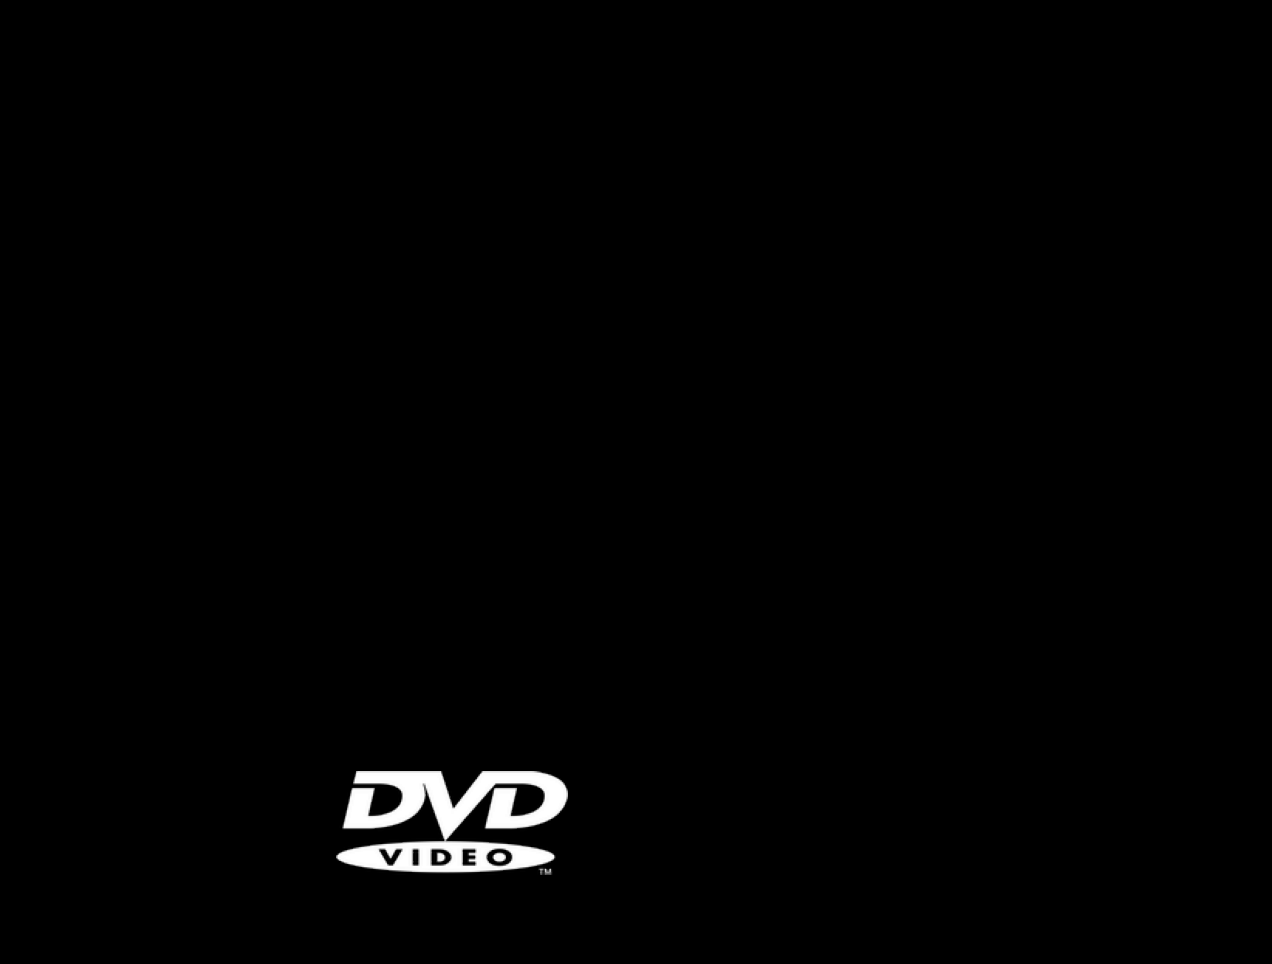

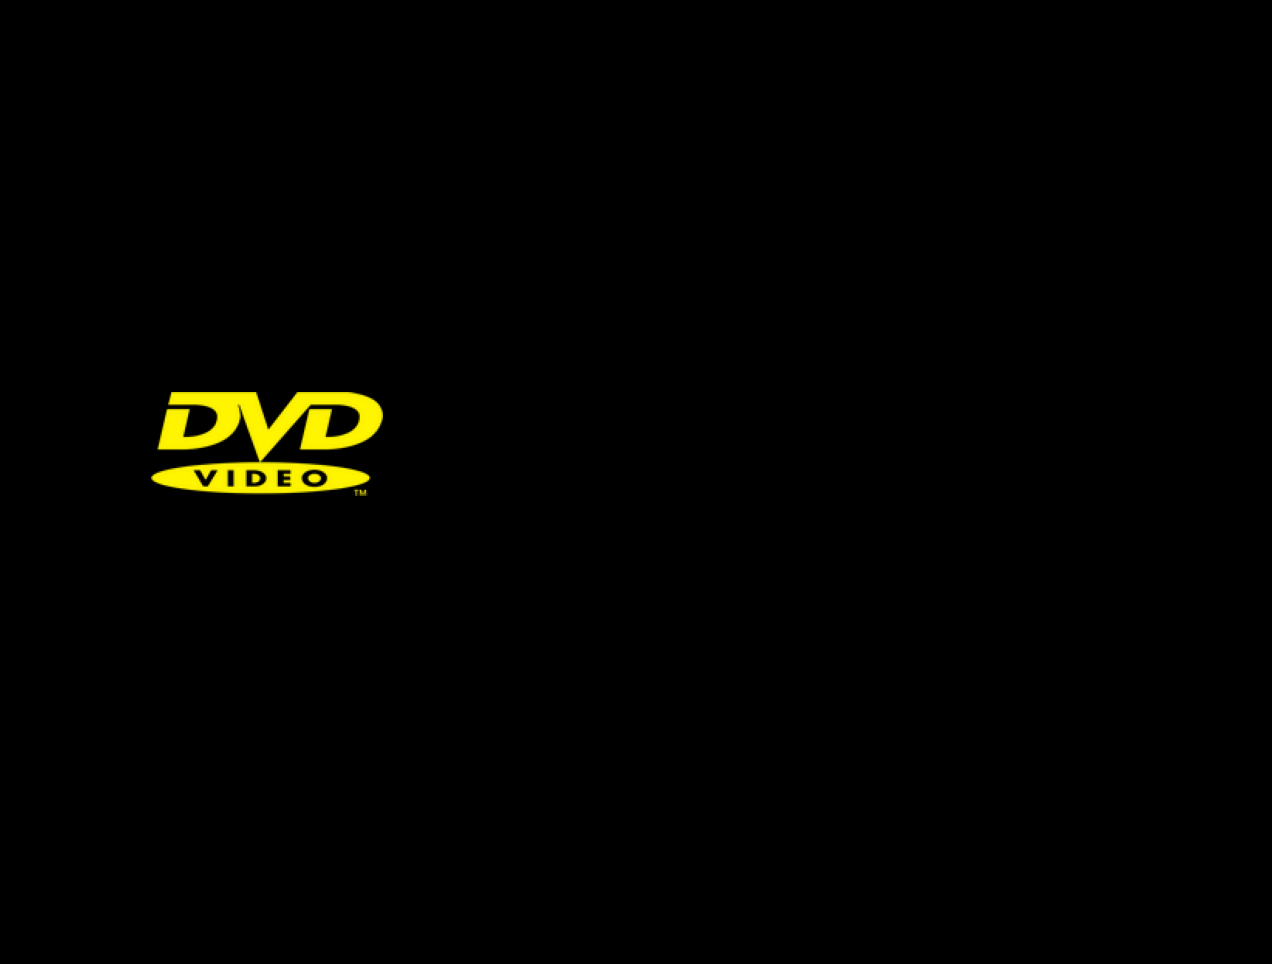

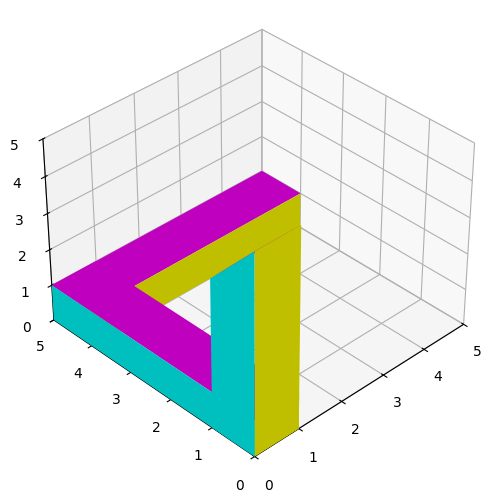

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.art3d import Poly3DCollection

def draw_custom_shapes():
    """
    Draws 3 separate 3D shapes similar to the output of Code 1,
    while maintaining cleaner and more modular code.
    """
    fig = plt.figure(figsize=(8, 6))
    ax = fig.add_subplot(111, projection='3d')

    # Function to add a cuboid to the plot
    def add_cuboid(ax, vertices, faces, colors):
        for face, color in zip(faces, colors):
            poly3d = Poly3DCollection([face], facecolors=color, linewidths=1, alpha=1, shade=False)
            ax.add_collection3d(poly3d)

    # Shape 1: Cuboid
    vertices1 = [
        [0, 0, 0], [1, 0, 0], [1, 5, 0], [0, 5, 0],
        [0, 0, 1], [1, 0, 1], [1, 5, 1], [0, 5, 1]
    ]
    faces1 = [
        [vertices1[4], vertices1[5], vertices1[6], vertices1[7]],  # Top face
        [vertices1[0], vertices1[1], vertices1[5], vertices1[4]],  # Side face 1
        [vertices1[0], vertices1[3], vertices1[7], vertices1[4]]   # Side face 2
    ]
    colors1 = ['m', 'y', 'c']

    # Shape 2: Another Cuboid
    vertices2 = [
        [0, 4, 0], [5, 4, 0], [5, 5, 0], [0, 5, 0],
        [0, 4, 1], [5, 4, 1], [5, 5, 1], [0, 5, 1]
    ]
    faces2 = [
        [vertices2[4], vertices2[5], vertices2[6], vertices2[7]],  # Top face
        [vertices2[0], vertices2[1], vertices2[5], vertices2[4]]   # Side face
    ]
    colors2 = ['m', 'y']

    # Shape 3: Slanted Top Cuboid
    a, b = 5.45, 4.05
    vertices3 = [
        [0, 0, 0], [1, 0, 0], [1, 1, 0], [0, 1, 0],
        [0, 0, a], [1, 0, a], [1, 1, b], [0, 1, b]
    ]
    faces3 = [
        [vertices3[4], vertices3[5], vertices3[6], vertices3[7]],  # Top face
        [vertices3[0], vertices3[1], vertices3[5], vertices3[4]],  # Side face 1
        [vertices3[0], vertices3[3], vertices3[7], vertices3[4]]   # Side face 2
    ]
    colors3 = ['m', 'y', 'c']

    # Add shapes to the plot
    add_cuboid(ax, vertices1, faces1, colors1)
    add_cuboid(ax, vertices2, faces2, colors2)
    add_cuboid(ax, vertices3, faces3, colors3)

    # Set axes limits and view
    ax.set_xlim(0, 5)
    ax.set_ylim(0, 5)
    ax.set_zlim(0, 5)
    ax.view_init(elev=35.7, azim=226)

    # Show the plot
    plt.show()

# Call the function to draw
draw_custom_shapes()